# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import owkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [87]:
#Creating Dataframe
cities_data=pd.DataFrame(cities,columns=["City"])
labels=["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"]
for each_label in labels:
    cities_data[each_label]=""

# Fetching City Data
record=0
units="Imperial"
for index, row in cities_data.iterrows():
    city=row["City"]
    try:
        url_string=f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={owkey}&units={units}"
        response=requests.get(url_string)
        city_info=response.json()
        #feeding data into dataframe
        cities_data.loc[index,"Lat"]=city_info["coord"]["lat"]
        cities_data.loc[index,"Lng"]=city_info["coord"]["lon"]
        cities_data.loc[index,"Max Temp"]=city_info["main"]["temp_max"]
        cities_data.loc[index,"Humidity"]=city_info["main"]["humidity"]
        cities_data.loc[index,"Cloudiness"]=city_info["clouds"]["all"]
        cities_data.loc[index,"Wind Speed"]=city_info["wind"]["speed"]
        cities_data.loc[index,"Country"]=city_info["sys"]["country"]
        cities_data.loc[index,"Date"]=city_info["dt"]
        print(f"Processing Record {record}| {city}")
        record=record+1
    except KeyError:
        pass
        print(f"{city} did not exist. Skipping...")
print("-"*30)
print("End of Records")


Processing Record 0| butaritari
Processing Record 1| saskylakh
Processing Record 2| hilo
Processing Record 3| busselton
Processing Record 4| port blair
Processing Record 5| ushuaia
Processing Record 6| torbay
Processing Record 7| kismayo
Processing Record 8| mandalgovi
Processing Record 9| katsuura
Processing Record 10| barrow
tsihombe did not exist. Skipping...
Processing Record 11| buala
Processing Record 12| jamestown
Processing Record 13| husavik
illoqqortoormiut did not exist. Skipping...
Processing Record 14| upernavik
taolanaro did not exist. Skipping...
Processing Record 15| qaanaaq
chagda did not exist. Skipping...
Processing Record 16| georgetown
Processing Record 17| pastos bons
Processing Record 18| chokurdakh
Processing Record 19| cape town
Processing Record 20| dikson
Processing Record 21| joao pinheiro
Processing Record 22| kita
Processing Record 23| sitka
Processing Record 24| lensk
Processing Record 25| la oroya
Processing Record 26| bredasdorp
Processing Record 27| ne

Processing Record 235| yerofey pavlovich
Processing Record 236| yeppoon
Processing Record 237| sibiti
Processing Record 238| staunton
Processing Record 239| clevedon
Processing Record 240| potlogi
Processing Record 241| kochki
Processing Record 242| mersing
Processing Record 243| van
grand river south east did not exist. Skipping...
Processing Record 244| cherskiy
Processing Record 245| bundaberg
Processing Record 246| sovetskaya gavan
Processing Record 247| kaitangata
Processing Record 248| puerto suarez
Processing Record 249| jaguaruna
nizhneyansk did not exist. Skipping...
Processing Record 250| svetlyy
uroteppa did not exist. Skipping...
Processing Record 251| port hardy
Processing Record 252| baherden
mergui did not exist. Skipping...
Processing Record 253| dolores
Processing Record 254| cockburn town
Processing Record 255| pisco
Processing Record 256| kruisfontein
Processing Record 257| ambilobe
Processing Record 258| uva
Processing Record 259| vila do maio
Processing Record 260|

Processing Record 453| calamba
Processing Record 454| schruns
Processing Record 455| mitsamiouli
Processing Record 456| markova
Processing Record 457| sao filipe
Processing Record 458| balakhninskiy
Processing Record 459| saint-francois
Processing Record 460| beloha
Processing Record 461| saint-jean-de-maurienne
Processing Record 462| finschhafen
Processing Record 463| cam ranh
Processing Record 464| suntar
Processing Record 465| shaoxing
Processing Record 466| maine-soroa
Processing Record 467| punta cardon
Processing Record 468| half moon bay
Processing Record 469| jawhar
Processing Record 470| nadym
Processing Record 471| lugovoy
Processing Record 472| sydney
Processing Record 473| bozhou
anar darreh did not exist. Skipping...
Processing Record 474| flinders
Processing Record 475| santa fe
Processing Record 476| conceicao do araguaia
Processing Record 477| mobaye
Processing Record 478| serrinha
Processing Record 479| presidencia roque saenz pena
Processing Record 480| sabha
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [88]:
cities_data["Lat"].replace("",np.nan,inplace=True)
cities_data.dropna(subset=["Lat"], inplace=True)
cities_data.reset_index(drop=True, inplace=True)
cities_data.to_csv(output_data_file)
cities_data.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [89]:
cities_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,79.32,88,100,11.48,KI,1595970743
1,saskylakh,71.92,114.08,48.29,63,48,3.91,RU,1595970743
2,hilo,19.73,-155.09,84.2,58,1,8.05,US,1595970743
3,busselton,-33.65,115.33,46,99,99,5.14,AU,1595970744
4,port blair,11.67,92.75,82.8,79,95,18.14,IN,1595970744
...,...,...,...,...,...,...,...,...,...
558,faya,18.39,42.45,71.6,64,20,5.14,SA,1595970937
559,sawtell,-30.38,153.1,55.4,76,16,8.05,AU,1595970937
560,cabo san lucas,22.89,-109.91,91.4,83,75,19.46,MX,1595970937
561,balad,34.02,44.15,101.48,10,0,9.08,IQ,1595970938


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [90]:
#No cities with a humidity over 100%
cities_data.sort_values(by="Humidity",ascending=False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
503,berlevag,70.86,29.09,59,100,15,5.82,NO,1595970918
517,grindavik,63.84,-22.43,50,100,90,8.05,IS,1595970922
353,bhaktapur,27.68,85.42,69.8,100,75,3.36,NP,1595970865
485,pangnirtung,66.15,-65.71,48.2,100,90,6.93,CA,1595970786
102,mount gambier,-37.83,140.77,37.4,100,75,8.05,AU,1595970776
...,...,...,...,...,...,...,...,...,...
188,hit,33.64,42.83,101.75,9,1,5.82,IQ,1595970805
201,azangaro,-14.92,-70.22,62.6,9,0,6.93,PE,1595970809
562,pahrump,36.21,-115.98,106,7,0,7,US,1595970878
73,ngunguru,-35.62,174.5,57.99,3,100,3,NZ,1595970767


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

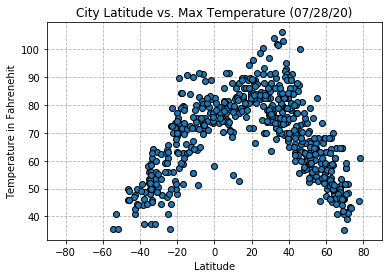

In [104]:
plt.scatter(cities_data["Lat"],cities_data["Max Temp"], edgecolors="black", zorder=3)
plt.title("City Latitude vs. Max Temperature (07/28/20)")
plt.xlabel("Latitude")
plt.ylabel("Temperature in Fahrenehit")
plt.xlim(-90,90)
plt.grid(linestyle="dashed", zorder=0)
plt.show()

## Latitude vs. Humidity Plot

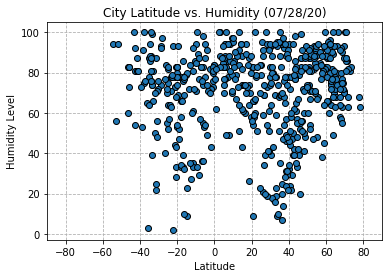

In [105]:
plt.scatter(cities_data["Lat"],cities_data["Humidity"], edgecolors="black", zorder=3)
plt.title("City Latitude vs. Humidity (07/28/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity Level")
plt.xlim(-90,90)
plt.grid(linestyle="dashed", zorder=0)
plt.show()

## Latitude vs. Cloudiness Plot

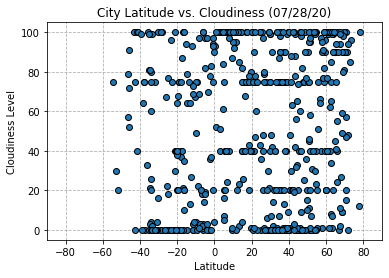

In [106]:
plt.scatter(cities_data["Lat"],cities_data["Cloudiness"], edgecolors="black", zorder=3)
plt.title("City Latitude vs. Cloudiness (07/28/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness Level")
plt.xlim(-90,90)
plt.grid(linestyle="dashed", zorder=0)
plt.show()

## Latitude vs. Wind Speed Plot

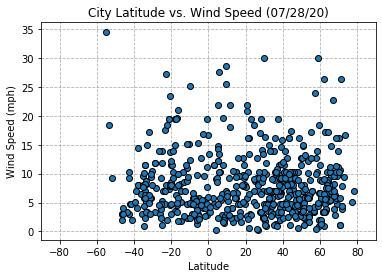

In [107]:
plt.scatter(cities_data["Lat"],cities_data["Wind Speed"], edgecolors="black", zorder=3)
plt.title("City Latitude vs. Wind Speed (07/28/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-90,90)
plt.grid(linestyle="dashed", zorder=0)
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


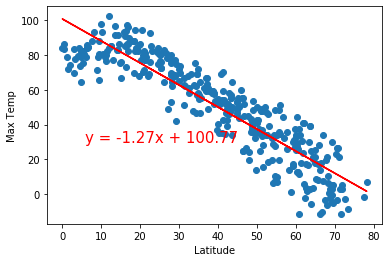

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


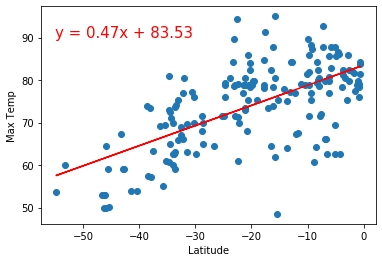

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


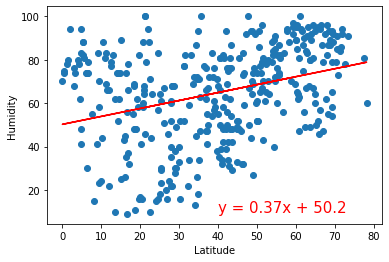

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


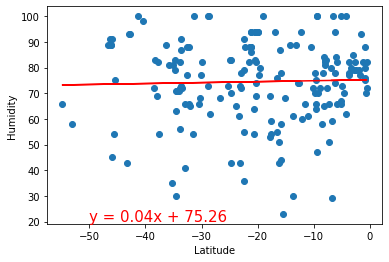

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


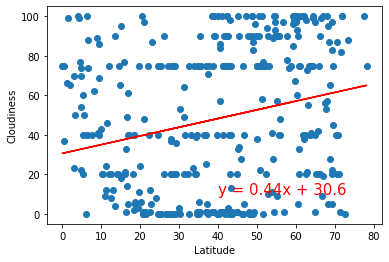

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


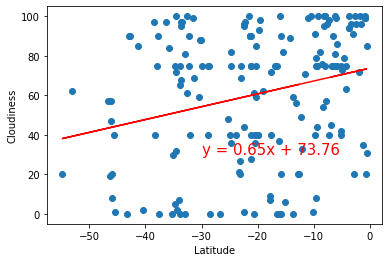

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


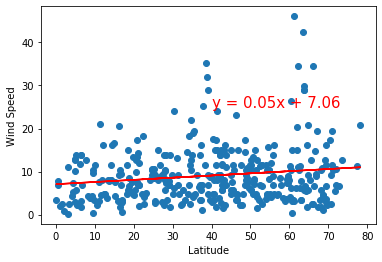

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


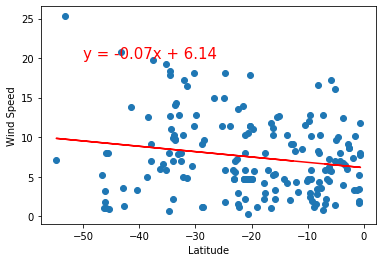